# Expectation Maximization (Mixture of Gaussians in 1D)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib auto

Using matplotlib backend: MacOSX


In [2]:
def gaussian1d(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

**Generate some data from a mixture of Gaussians**

In [3]:
mixture_of_gaussians = [(-19, 2.5, 13), (-1, 4, 4), (15, 5, 9)]
x_values = np.linspace(-30, 30, 120)

In [4]:
def plot_mog(mog, x_values):
    for mu, sig, num in mog:
        plt.plot(x_values, gaussian1d(x_values, mu, sig))
#plot_mog(mixture_of_gaussians, x_values)

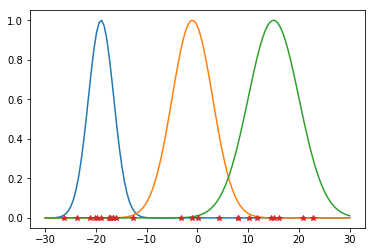

In [5]:
N = 0
for _, _, num in mixture_of_gaussians:
    N += num
x = np.empty([N])
s = 0
for mu, sig, num in mixture_of_gaussians:
    x[s:s+num] = np.random.normal(mu, sig, num)
    s += num
#print(x)

plot_mog(mixture_of_gaussians, x_values)
plt.plot(x,np.zeros(x.shape),'*')

## Expectation Maximization

Initialization

In [6]:
def em_init(x, K):
    N = len(x)
    
    mog_estimate = []
    for k in range(K):
        mog_estimate.append((np.random.uniform(-20,20),np.random.uniform(1,3),1./K))
        
    w = np.empty([N, K])
    return mog_estimate, w

E Step

In [7]:
def e_step(x, mog_estimate):
    N = len(x)
    K = len(mog_estimate)
    
    for i in range(N):
        for k in range(K):
            mu, sig, alpha = mog_estimate[k]
            w[i,k] = gaussian1d(x[i], mu, sig) * alpha
        w[i,:] /= np.linalg.norm(w[i,:])
    return w

M Step

In [8]:
def m_step(x, mog_estimate, w):
    Nk = np.sum(w,0)
    K = len(mog_estimate)
    
    for k in range(K):
        new_alpha = Nk[k]/N
        new_mean = np.dot(w[:,k], x)/Nk[k]
        new_sigma = np.sqrt(np.dot(w[:,k], np.square(x - new_mean))/Nk[k])
        mog_estimate[k] = (new_mean, new_sigma, new_alpha)
    return mog_estimate

EM in action

In [9]:
%matplotlib auto
plt.ion()

em_steps = 10
mog_estimate, w = em_init(x, 3)

plt.figure(1)
for s in range(em_steps):
    plt.clf()
    plot_mog(mog_estimate, x_values)
    plt.plot(x,np.zeros(x.shape),'*')
    plt.title('EM step %s' % s)
    plt.pause(0.5)
    w = e_step(x, mog_estimate)
    mog_estimate = m_step(x, mog_estimate, w)

Using matplotlib backend: MacOSX


In [10]:
plt.figure(1)
plt.close()